Imports

In [8]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [9]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)


Die initiale policy

In [10]:
def init_policy():
    
    if np.random.random() < 0.8:
        # Zu 80% eine bevorzugte Aktion Richtung Ziel wählen
        return np.random.choice([1,2])
    else:
        return np.random.choice([0,3])

Lösung Aufgabe 3.2 a)

[[0.006 0.008 0.019 0.006]
 [0.014 0.    0.046 0.   ]
 [0.036 0.103 0.151 0.   ]
 [0.    0.201 0.463 1.   ]]
289.0


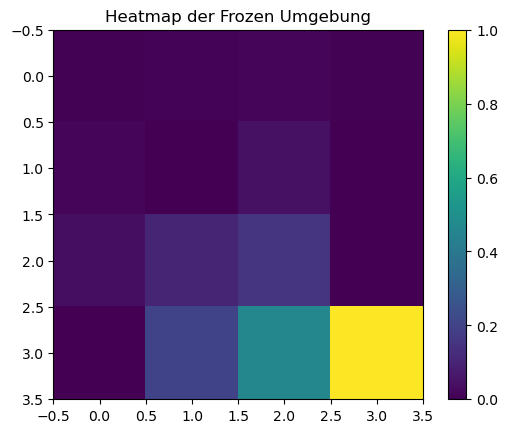

In [12]:
# Die Anzahl aller erfolgreichen Episoden
sum_rewards = 0
episodes = 10000
factor = 0.9
# die State values
values = np.zeros(16)
# zählt die Anzahl der ersten Besuche eines states in einer Episode
visits_arr = np.zeros(16)
# S(s)
sum_return = np.zeros(16)


for _ in range(episodes):
    state = env.reset()[0]
    terminated = False
    truncated = False
    # ist initial 0, und wird hochiteriert, falls ein state besucht wird.
    # Wird nach jeder Episode resettet
    time_visited = np.zeros(16)
    time_visited[0] += 1
    visits_arr[0] += 1
    # Besuchter state zu Zeitpunkt t
    states_t = []
    # Reward zu Zeitpunkt t
    rewards_t = []
    T = 0

    while True:
        state, reward, terminated, truncated, _ = env.step(init_policy())
        T += 1
        states_t.append(state)
        rewards_t.append(reward)

        if time_visited[state] == 0:
            time_visited[state] += 1
            visits_arr[state] += 1
        if terminated or truncated:
            sum_rewards += reward
            g = 0
            
           
            for t in reversed(range(T)):
                current_state = states_t[t]
                g = factor * g + rewards_t[t]
                if current_state not in states_t[:t]:
                    sum_return[current_state] += g
                    values[current_state] = sum_return[current_state] / visits_arr[current_state]
            break

values = np.round(values.reshape(4,4), 3)
print(values)
print(sum_rewards)

# Heatmap erstellen
plt.imshow(values, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Farbskala hinzufügen
plt.title('Heatmap der Frozen Umgebung')
plt.show()

Lösung 3.2 b)

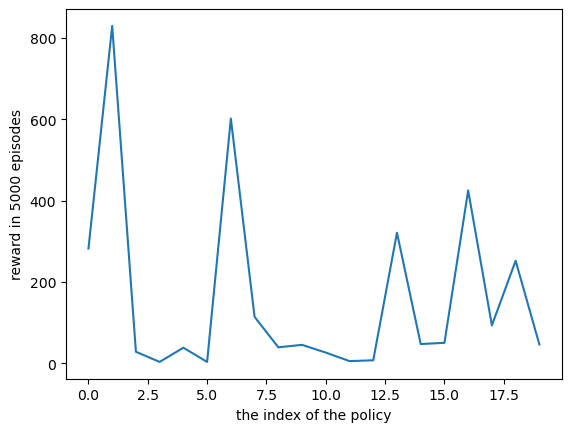

best policy: 
[['→' '↑' '→' '↓']
 ['→' '←' '↑' '←']
 ['↓' '←' '↑' '←']
 ['←' '←' '↓' '↓']]
with reward: 830.0
action values of best policy:
[[0.004 0.004 0.005 0.005]
 [0.002 0.002 0.002 0.002]
 [0.    0.001 0.002 0.001]
 [0.    0.    0.    0.   ]
 [0.008 0.006 0.009 0.009]
 [0.    0.    0.    0.   ]
 [0.005 0.003 0.003 0.009]
 [0.    0.    0.    0.   ]
 [0.02  0.025 0.018 0.02 ]
 [0.059 0.055 0.048 0.05 ]
 [0.078 0.08  0.073 0.086]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.127 0.112 0.12  0.119]
 [0.324 0.324 0.295 0.271]
 [0.    1.    1.    1.   ]]


In [ ]:
def print_policy(policy):
    arrows = ["←", "↓", "→", "↑"]
    policy = np.array([arrows[state] for state in policy]).reshape((4, 4))
    print(policy)


sum_rewards = 0
factor = 0.8
episodes = 5000
# epsilon das entscheidet, ob explored wird oder die aktive policy genutzt wird
epsilon = 0.8
converged = False
policy_arr = []
first_run = True
counter = 0
performance = []
best_value = None

policy = np.zeros(16, dtype=int)


while not converged:
    # N(s) und S(s) werden resettet um jede policy einzeln bewerten zu können
    visits_arr = np.zeros((16, 4))
    values = np.zeros((16, 4))
    sum_return = np.zeros((16, 4))
    counter += 1
    sum_rewards = 0

    for _ in range(episodes):
        state = env.reset()[0]
        terminated = False
        truncated = False
        time_visited = np.zeros((16, 4))
        states_actions_t = []
        rewards_t = []
        T = 0
        while True:
            action = None
            if first_run:
                action = init_policy()
            else:
                if (np.random.random() < epsilon):
                    action = policy[state]
                else:
                    action = env.action_space.sample()

            state, reward, terminated, truncated, _ = env.step(action)
            if T == 0:
                time_visited[0, action] += 1
                visits_arr[0, action] += 1

            T += 1

            states_actions_t.append((state, action))
            rewards_t.append(reward)

            if time_visited[state, action] == 0:
                time_visited[state, action] += 1
                visits_arr[state, action] += 1
            if terminated or truncated:
                sum_rewards += reward
                g = 0

                for t in reversed(range(T)):
                    current_state_action = states_actions_t[t]
                    g = factor * g + rewards_t[t]
                    if current_state_action not in states_actions_t[:t]:
                        sum_return[current_state_action[0],
                                   current_state_action[1]] += g
                        values[current_state_action[0],
                               current_state_action[1]] = sum_return[current_state_action[0],
                                                                     current_state_action[1]] / visits_arr[current_state_action[0], current_state_action[1]]
                        values = np.round(values, 5)
                break
    # loop terminiert entweder wenn keine Änderungen an der policy vorgenommen werden oder nach 40 loops
    converged = True
    performance.append(sum_rewards)
    if sum_rewards == max(performance):
        best_value = values
    for state in range(16):
        old_policy = policy[state]
        policy[state] = np.argmax(values[state])
        if old_policy != policy[state]:
            converged = False
    first_run = False
    policy_arr.append(policy.copy())
    if counter == 40:
        break


plt.plot(performance)
plt.ylabel("reward in 5000 episodes")
plt.xlabel("the index of the policy")
plt.show()
max_index = performance.index(max(performance))
print("best policy: ")
print_policy(policy_arr[max_index])
print("with reward: " + str(performance[max_index]))
print("action values of best policy:")
print(np.round(best_value, 3))